In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
root_dir = '/Volumes/data/Projects/Papers-Projects/FGO-Net/高斯模糊图'

In [3]:
img_dir = r'/Volumes/data/Projects/Papers-Projects/FGO-Net/高斯模糊图/img.jpg'

In [17]:
def add_img_sal(img_dir, sal_dir, ratio=0.5):
    img = cv2.imread(img_dir, cv2.COLOR_BGR2RGB)
    gray_img = cv2.imread(sal_dir, cv2.IMREAD_GRAYSCALE) # gray img [0, 255]
    norm_img = np.asarray(gray_img, dtype=np.uint8)
    
    heat_img = cv2.applyColorMap(norm_img, cv2.COLORMAP_JET) # 注意此处的三通道热力图是cv2专有的GBR排列
    heat_img = cv2.cvtColor(heat_img, cv2.COLOR_BGR2RGB)
    
    img_add = cv2.addWeighted(img, ratio, heat_img, 1-ratio, 0)
    img_add = cv2.cvtColor(img_add, cv2.COLOR_RGB2BGR)
    return img_add

In [18]:
def mdir(x):
    if not os.path.exists(x):
        os.makedirs(x)

In [19]:
sal_dirs = [f'pred_{i}' for i in range(10)]
sal_dirs.append('gt_sal')

In [20]:
sal_dirs

['pred_0',
 'pred_1',
 'pred_2',
 'pred_3',
 'pred_4',
 'pred_5',
 'pred_6',
 'pred_7',
 'pred_8',
 'pred_9',
 'gt_sal']

In [21]:
for sal_dir in sal_dirs:
    dst = add_img_sal(img_dir, f'{root_dir}/{sal_dir}.png')
    dst_dir = f'{root_dir}/heatmap/{sal_dir}.png'
    cv2.imwrite(dst_dir, dst)

In [22]:
fix_dir = f'{root_dir}/gt_fix.png'

In [23]:
img = cv2.imread(img_dir)

In [24]:
fix = cv2.imread(fix_dir, cv2.IMREAD_GRAYSCALE)

In [25]:
img[fix==255, :] = [255, 0, 0]

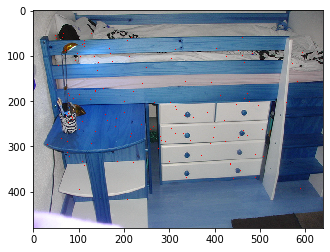

In [26]:
plt.imshow(img)

In [27]:
point_size = 2
point_color = (0, 0, 255) # BGR
thickness = 4 # 可以为 0 、4、8

# 要画的点的坐标
h, w = fix.shape



for i in range(h):
    for j in range(w):
        if fix[i, j] == 255:
            cv2.circle(img, (i, j), point_size, point_color, thickness)

In [28]:
img.shape

(480, 640, 3)

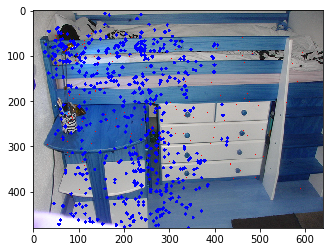

In [29]:
plt.imshow(img)

In [31]:
img = img.astype(np.uint8)

In [35]:
cv2.imwrite(f'{root_dir}/heatmap/gt_fix.png', img)

True

In [33]:
f'{root_dir}/heatmap/gt_fix.png'

'/Volumes/data/Projects/Papers-Projects/FGO-Net/高斯模糊图/heatmap/gt_fix.png'

In [34]:
img.shape

(480, 640, 3)